In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score, plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score

**Importing the dataset**

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Splitting the dataset into the Training set and Test set**

In [4]:
df.drop(columns="User ID",inplace=True)

In [5]:
df["Gender"]=df["Gender"].map({"Male":1,"Female":0})

In [6]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Feature Scaling**

In [7]:
X=df[["Gender","Age","EstimatedSalary"]].values
y=df["Purchased"].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25) # train- test split
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [9]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train_scaled,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train_scaled,y_train) , " cv score : ", np.mean(cross_val_score(knn, X_train_scaled, y_train, cv=10)))

K value  :  1  train score :  0.9966666666666667  cv score :  0.8533333333333333
K value  :  2  train score :  0.9333333333333333  cv score :  0.8299999999999998
K value  :  3  train score :  0.93  cv score :  0.8966666666666668
K value  :  4  train score :  0.9166666666666666  cv score :  0.8866666666666669
K value  :  5  train score :  0.9133333333333333  cv score :  0.9033333333333335
K value  :  6  train score :  0.9233333333333333  cv score :  0.89
K value  :  7  train score :  0.9133333333333333  cv score :  0.9033333333333333
K value  :  8  train score :  0.9166666666666666  cv score :  0.8966666666666667
K value  :  9  train score :  0.92  cv score :  0.9099999999999999
K value  :  10  train score :  0.91  cv score :  0.9066666666666668
K value  :  20  train score :  0.9  cv score :  0.8699999999999999
K value  :  50  train score :  0.8033333333333333  cv score :  0.7866666666666667


**Predicting the Test set results**

In [10]:
knn = KNeighborsClassifier(9)
knn.fit(X_train_scaled,y_train)
knn.score(X_test_scaled,y_test)

0.9

In [11]:
y_pred = knn.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [12]:
accuracy_score(y_test, y_pred)

0.9

**Making the Confusion Matrix**

In [13]:
y_pred=knn.predict(X_test_scaled)

In [14]:
confusion_matrix(y_test,y_pred)

array([[64,  6],
       [ 4, 26]], dtype=int64)

In [15]:
#dir(knn)

### Train data visualization

(-1.9311780936999463, 2.1467243666015996)

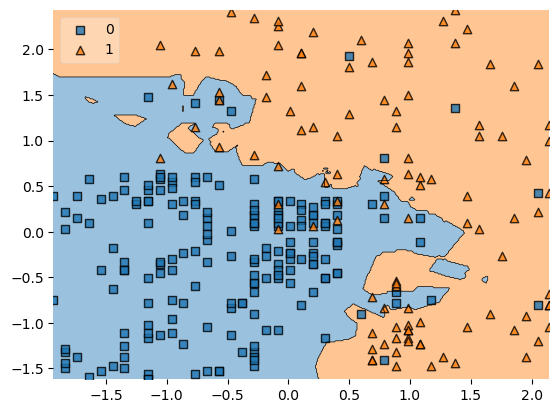

In [16]:
from mlxtend.plotting import plot_decision_regions
X=df.iloc[:,0:3]
y=df.iloc[:,3]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

X_train = X_train.iloc[:,1:3]
X_test = X_test.iloc[:,1:3]

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

knn = KNeighborsClassifier(4)
knn.fit(X_train_scaled,y_train)

ax=plot_decision_regions(X_train_scaled, y_train.values, clf=knn, legend= 2)
ax.set_ylim(X_train_scaled[:,1].min(), X_train_scaled[:,1].max())
ax.set_xlim(X_train_scaled[:,0].min(), X_train_scaled[:,0].max())

### Test data visulization

(-1.9311780936999463, 2.049631450880134)

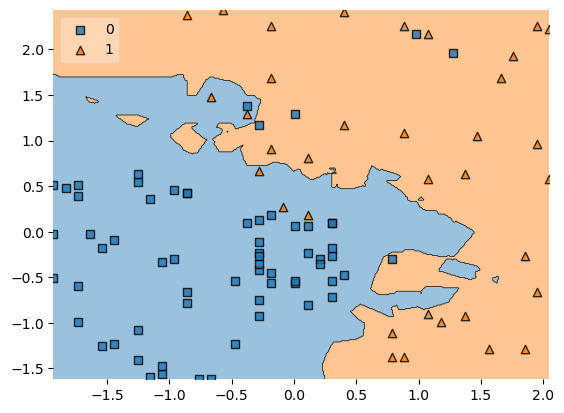

In [17]:
ax=plot_decision_regions(X_test_scaled, y_test.values, clf=knn, legend= 2)
ax.set_ylim(X_test_scaled[:,1].min(), X_test_scaled[:,1].max())
ax.set_xlim(X_test_scaled[:,0].min(), X_test_scaled[:,0].max())